In [1]:
#importing libraries for use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
""" Dark theme for plotting """

from matplotlib import style
style.use('dark_background')

In [3]:
"""importing the data after downloading it from Kaggle"""

titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

In [4]:
""" Preliminary checks of the data, the 5 number summary and the information relating to the dataset"""
print("Titanic Training Data example rows:")
display(titanic_train.head())
print("Titanic Testing Data example rows:")
display(titanic_test.head())

Titanic Training Data example rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Titanic Testing Data example rows:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("Titanic Training Data Information:")
display(titanic_train.info())

Titanic Training Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [6]:
print("Titanic Training Data Summary:")
display(titanic_train.describe())

Titanic Training Data Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There are 891 rows in the data with missing values in Age, Cabin, Embarked. The information also suggests that cabin has the last number of observations which is <30% of the values so dropping it would be a good idea. The other values can be imputed as required. 

<AxesSubplot:xlabel='Embarked', ylabel='count'>

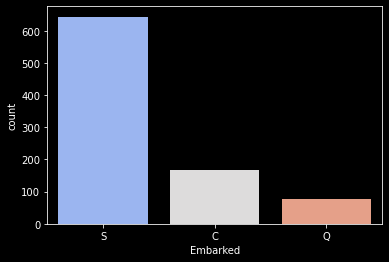

In [7]:
""" Making simple plots to understand the data further. 
The data might show trends or indicate relationships in this stage."""

sns.countplot(x = 'Embarked', data = titanic_train, palette = 'coolwarm')

In [8]:
titanic_corr = titanic_train.corr()['Survived'].sort_values(ascending = False)[1:]
titanic_corr

Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

The correlation shows there is barely any relation between passenger Id and Parch with the target field.

<AxesSubplot:>

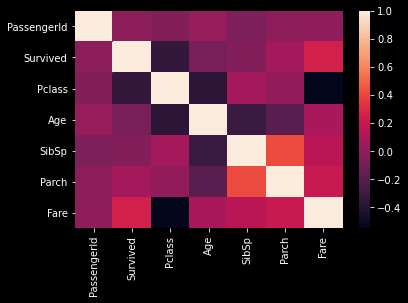

In [9]:
sns.heatmap(titanic_train.corr())

In [10]:
survivors_count = titanic_train[titanic_train['Survived']==1]['PassengerId'].count()
survivors_class1 =  titanic_train[titanic_train['Survived']==1].groupby('Pclass').count()['Survived'][1]
survivors_class2 =  titanic_train[titanic_train['Survived']==1].groupby('Pclass').count()['Survived'][2]
survivors_class3 =  titanic_train[titanic_train['Survived']==1].groupby('Pclass').count()['Survived'][3]

not_survivors_count = titanic_train[titanic_train['Survived']==0]['PassengerId'].count()
not_survivors_class1 =  titanic_train[titanic_train['Survived']==0].groupby('Pclass').count()['Survived'][1]
not_survivors_class2 =  titanic_train[titanic_train['Survived']==0].groupby('Pclass').count()['Survived'][2]
not_survivors_class3 =  titanic_train[titanic_train['Survived']==0].groupby('Pclass').count()['Survived'][3]

In [11]:
print("Details of Individuals who SURVIVED the Titanic are given as follows;")
print("Total Survivors in the Dataset : {} \n Total Survivors in the Dataset from Passenger Class 1: {} \n Total Survivors in the Dataset from Passenger Class 2: {} \n Total Survivors in the Dataset from Passenger Class 3: {}".format(survivors_count, survivors_class1, survivors_class2, survivors_class3))

Details of Individuals who SURVIVED the Titanic are given as follows;
Total Survivors in the Dataset : 342 
 Total Survivors in the Dataset from Passenger Class 1: 136 
 Total Survivors in the Dataset from Passenger Class 2: 87 
 Total Survivors in the Dataset from Passenger Class 3: 119


In [12]:
print("Details of Individuals who DID NOT SURVIVE the Titanic are given as follows;")
print("Total Non-Survivors in the Dataset : {} \n Total Non-Survivors in the Dataset from Passenger Class 1: {} \n Total Non-Survivors in the Dataset from Passenger Class 2: {} \n Total Non-Survivors in the Dataset from Passenger Class 3: {}".format(not_survivors_count, not_survivors_class1, not_survivors_class2, not_survivors_class3))

Details of Individuals who DID NOT SURVIVE the Titanic are given as follows;
Total Non-Survivors in the Dataset : 549 
 Total Non-Survivors in the Dataset from Passenger Class 1: 80 
 Total Non-Survivors in the Dataset from Passenger Class 2: 97 
 Total Non-Survivors in the Dataset from Passenger Class 3: 372


Text(0, 0.5, 'No. of Passengers')

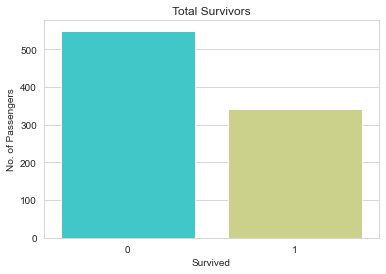

In [13]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',data = titanic_train, palette = 'rainbow')
plt.title(" Total Survivors ")
plt.ylabel("No. of Passengers")


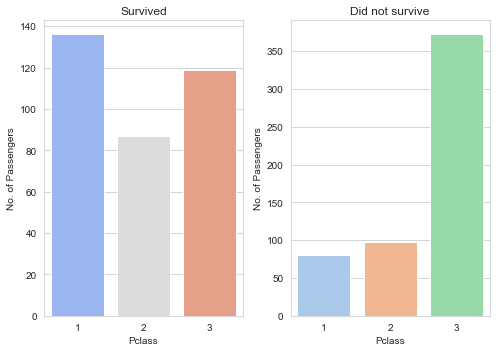

In [14]:
plt.figure(figsize = (7,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Pclass',data = titanic_train[titanic_train['Survived'] == 1], palette = 'coolwarm')
plt.title("Survived")
plt.ylabel("No. of Passengers")
plt.subplot(1,2,2)
sns.countplot(x = 'Pclass',data = titanic_train[titanic_train['Survived'] == 0], palette = 'pastel')
plt.ylabel("No. of Passengers")
plt.title("Did not survive")
plt.tight_layout()

"""

The count plots show that the passengers who did not survive were majorly from Class 3 (372 out of 549) and clearly the passengers from Class 1 were most likely to survive (136 survivors and 80 non-survivors) 

"""

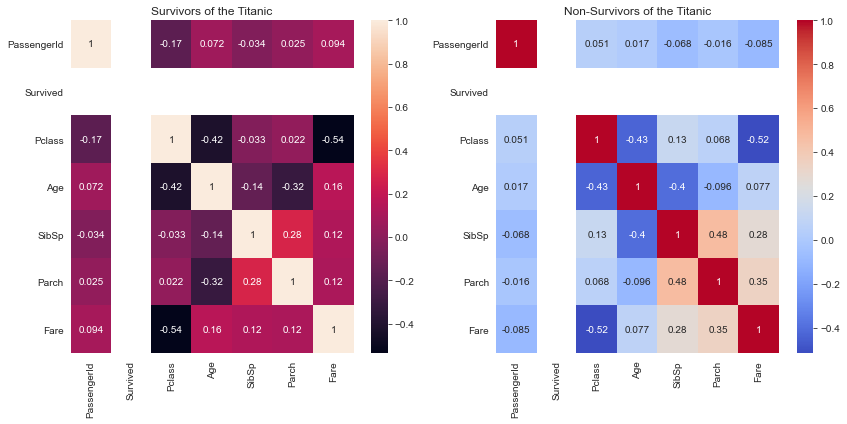

In [15]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.heatmap(titanic_train[titanic_train['Survived']==1].corr(), annot = True)
plt.title('Survivors of the Titanic')
plt.subplot(1,2,2)
sns.heatmap(titanic_train[titanic_train['Survived']==0].corr(), annot = True, cmap = 'coolwarm')
plt.title('Non-Survivors of the Titanic')
plt.tight_layout()

In [16]:
""" There are 177 null values in the Age column which need to be imputed for further analysis """
titanic_train[['Pclass','Age']].count()

Pclass    891
Age       714
dtype: int64

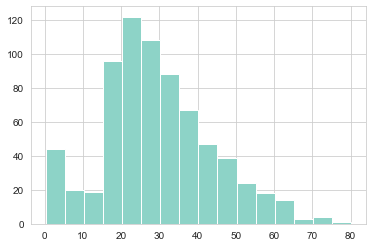

In [17]:
plt.hist(x = 'Age',bins = 16, data = titanic_train);

In [18]:
titanic_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

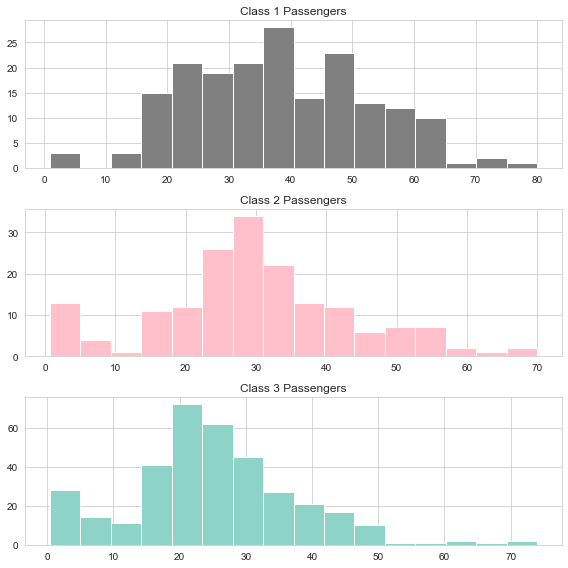

In [19]:
plt.figure(figsize = (8,8))

plt.subplot(3,1,1)
plt.hist(x = 'Age',bins = 16, data = titanic_train[titanic_train['Pclass'] == 1], color = 'gray');
plt.title("Class 1 Passengers")

plt.subplot(3,1,2)
plt.hist(x = 'Age',bins = 16, data = titanic_train[titanic_train['Pclass'] == 2], color = 'pink' );
plt.title("Class 2 Passengers")

plt.subplot(3,1,3)
plt.hist(x = 'Age',bins = 16, data = titanic_train[titanic_train['Pclass'] == 3]);
plt.title("Class 3 Passengers")

plt.tight_layout()


In [20]:
titanic_train.groupby('Pclass')['Age'].describe()[['mean','50%']]

,mean,50%
Pclass,,
1,38.233441,37.0
2,29.877630,29.0
3,25.140620,24.0


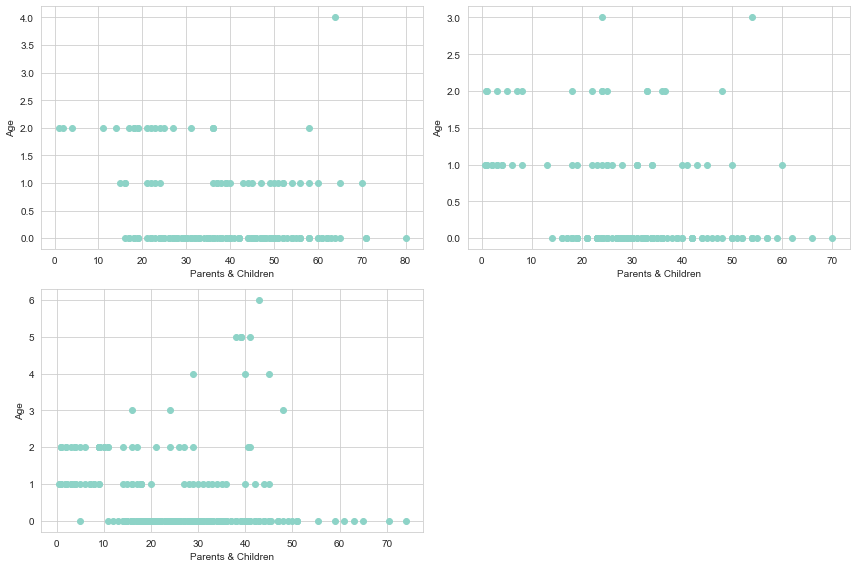

In [21]:
plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.scatter(x = 'Age', y = 'Parch', data = titanic_train[titanic_train['Pclass']==1])
plt.xlabel('Parents & Children')
plt.ylabel('Age')
plt.subplot(2,2,2)
plt.scatter(x = 'Age', y = 'Parch', data = titanic_train[titanic_train['Pclass']==2])
plt.xlabel('Parents & Children')
plt.ylabel('Age')
plt.subplot(2,2,3)
plt.scatter(x = 'Age', y = 'Parch', data = titanic_train[titanic_train['Pclass']==3])
plt.xlabel('Parents & Children')
plt.ylabel('Age')
plt.tight_layout()

In [22]:
titanic_train[titanic_train['Survived']==1].groupby('Pclass')['Parch'].value_counts(ascending = False)

Pclass  Parch
1       0        99
        1        21
        2        16
2       0        48
        1        24
        2        13
        3         2
3       0        86
        1        20
        2        11
        3         1
        5         1
Name: Parch, dtype: int64

In [23]:
titanic_train[titanic_train['Survived']==0].groupby('Pclass')['Parch'].value_counts(ascending = False)

Pclass  Parch
1       0         64
        1         10
        2          5
        4          1
2       0         86
        1          8
        2          3
3       0        295
        1         35
        2         32
        5          4
        4          3
        3          2
        6          1
Name: Parch, dtype: int64

In [24]:
display(titanic_train[titanic_train['Survived']==1]['Age'].isnull().value_counts())
display(titanic_train[titanic_train['Survived']==0]['Age'].isnull().value_counts())

False    290
True      52
Name: Age, dtype: int64

False    424
True     125
Name: Age, dtype: int64

In [25]:
titanic_train[titanic_train['Survived']==1]['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
titanic_train[titanic_train['Survived']==0]['Age'].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [27]:
titanic_train1 = titanic_train.copy()

In [28]:
def impute_age(cols):
    Age = cols[0]
    Survived = cols[1]
    
    if pd.isnull(Age):

        if Survived == 1:
            return 28

        elif Survived == 0:
            return 30

    else:
        return Age

In [29]:
titanic_train1['Age'] = titanic_train1[['Age','Survived']].apply(impute_age,axis=1)

In [30]:
titanic_train1['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

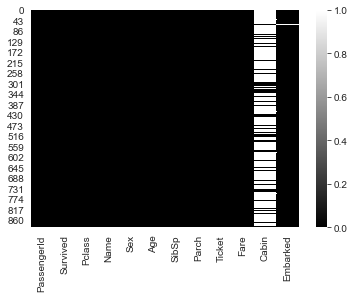

In [31]:
sns.heatmap(titanic_train1.isnull(), cmap = 'gray');

In [32]:
titanic_train1.drop('Cabin',axis = 1, inplace = True)

In [33]:
titanic_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [34]:
titanic_train1[titanic_train1['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [35]:
titanic_train1.groupby(['Pclass','Sex'])['Embarked'].value_counts()

Pclass  Sex     Embarked
1       female  S            48
                C            43
                Q             1
        male    S            79
                C            42
                Q             1
2       female  S            67
                C             7
                Q             2
        male    S            97
                C            10
                Q             1
3       female  S            88
                Q            33
                C            23
        male    S           265
                C            43
                Q            39
Name: Embarked, dtype: int64

In [36]:
titanic_train1[(titanic_train1['Fare']>80) & (titanic_train1['Fare']<90) & (titanic_train1['Age'] > 50)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C


In [37]:
titanic_train1[(titanic_train1['Fare']>80) & (titanic_train1['Fare']<90) & (titanic_train1['Age'] < 40)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,S
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,28.0,1,0,PC 17604,82.1708,C
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,S
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,C
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28.0,1,0,17453,89.1042,C


In [38]:
titanic_train1['Embarked'].fillna('S',inplace = True)

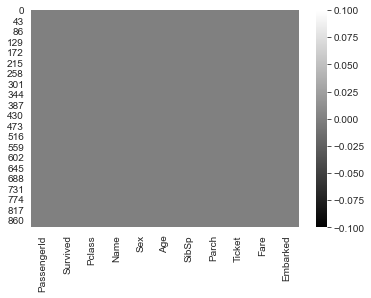

In [39]:
sns.heatmap(titanic_train1.isnull(), cmap = 'gray');

In [40]:
titanic_train1.isnull().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Embarked
False        False     False   False  False  False  False  False  False   False  False       891
dtype: int64

In [41]:
titanic_train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
titanic_train1.drop(['Name','Ticket'],axis = 1, inplace = True)

sex = pd.get_dummies(titanic_train1['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_train1['Embarked'],drop_first=True)

In [43]:
titanic_train1.drop(['Sex','Embarked'],axis = 1, inplace = True)

In [44]:
titanic_train1 = pd.concat([titanic_train1,sex,embark],axis = 1)

In [45]:
titanic_train1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,30.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [47]:
LR = LogisticRegression()
DR = DecisionTreeRegressor()
RR = RandomForestRegressor()

In [48]:
titanic_train1.drop('PassengerId',axis = 1, inplace = True)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(titanic_train1.drop(['Survived'],axis = 1),titanic_train1['Survived'],test_size=0.3)

In [89]:
LR.fit(X_train,y_train)

C:\Users\yashg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
print(classification_report(y_test,LR.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       162
           1       0.80      0.65      0.72       106

    accuracy                           0.80       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.80      0.79       268



In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [93]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [94]:
print(classification_report(y_test,KNN.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       162
           1       0.67      0.65      0.66       106

    accuracy                           0.74       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.73      0.74      0.73       268



In [95]:
error_rate = []

for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

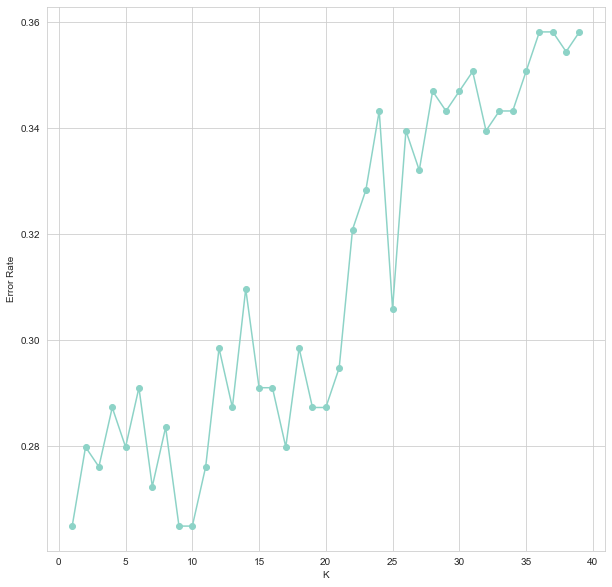

In [96]:
plt.figure(figsize = (10,10))
plt.plot(range(1,40),error_rate, marker = 'o')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [101]:
KNN2 = KNeighborsClassifier(n_neighbors=10)

In [102]:
KNN2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [103]:
print(classification_report(y_test,KNN2.predict(X_test)))
print('\n')
print(confusion_matrix(y_test,KNN2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       162
           1       0.75      0.49      0.59       106

    accuracy                           0.74       268
   macro avg       0.74      0.69      0.70       268
weighted avg       0.74      0.74      0.72       268



[[145  17]
 [ 54  52]]
